In [1]:
# pip install networkx==2.3
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re
import numpy as np
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', 100)

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
root_path = 'gdrive/My Drive/Colab Notebooks/'

**Tweets Data Analysis**

In [4]:
# Load dataset
def load_data():
    data = pd.read_csv("gdrive/My Drive/Colab Notebooks/srilanka_easter.csv")
    data.columns = data.columns.str.replace(' ','_')
    return data


def load_credible_data():
    data = pd.read_csv("gdrive/My Drive/Colab Notebooks/credible_tweets.csv")
    data.columns = data.columns.str.replace(' ','_')
    return data

In [5]:
tweet_df = load_data()
tweet_df.head(2)

tweet_credible_df = load_credible_data()
tweet_credible_df.head(2)

,Tweet_Id,Tweet_URL,Tweet_Posted_Time_(UTC),Tweet_Content,Tweet_Type,Client,Retweets_Received,Favourites_Received,Tweet_Location,Tweet_Language,...,Screen_Name,User_Bio,Verified_or_Non-Verified,Profile_URL,Protected_or_Non-protected,User_Followers,User_Following,Favourites_Count,Statuses_Count,User_Account_Creation_Date
0,"""1129298331744768000""",https://twitter.com/Adadrana/status/1129298331744768000,17/05/2019 08:11,https://t.co/U5hkTCBPbC \n#eastersundayattackslk #srilankaattacks #srilankan #colombo #attacks #...,Tweet,Twitter Web Client,0,6,Sri Lanka,qme,...,Adadrana,සත්‍ය වළලන්නට පෙර,Non-Verified,https://twitter.com/Adadrana,Non-Protected,604,1796,191,3123,26/02/2019 03:50
1,"""1128966069069258753""",https://twitter.com/Adadrana/status/1128966069069258753,16/05/2019 10:11,#eastersundayattackslk #srilankaattacks #srilankan #colombo #attacks #sri #srilanka #lka #india ...,Tweet,IFTTT,0,4,Sri Lanka,qme,...,Adadrana,සත්‍ය වළලන්නට පෙර,Non-Verified,https://twitter.com/Adadrana,Non-Protected,604,1796,191,3123,26/02/2019 03:50


In [6]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (10963, 22)
Columns are: Index(['Tweet_Id', 'Tweet_URL', 'Tweet_Posted_Time_(UTC)', 'Tweet_Content',
       'Tweet_Type', 'Client', 'Retweets_Received', 'Favourites_Received',
       'Tweet_Location', 'Tweet_Language', 'User_Id', 'Name', 'Screen_Name',
       'User_Bio', 'Verified_or_Non-Verified', 'Profile_URL',
       'Protected_or_Non-protected', 'User_Followers', 'User_Following',
       'Favourites_Count', 'Statuses_Count', 'User_Account_Creation_Date'],
      dtype='object')


In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Tweet_Id                    10963 non-null  object
 1   Tweet_URL                   10963 non-null  object
 2   Tweet_Posted_Time_(UTC)     10963 non-null  object
 3   Tweet_Content               10963 non-null  object
 4   Tweet_Type                  10963 non-null  object
 5   Client                      10963 non-null  object
 6   Retweets_Received           10963 non-null  int64 
 7   Favourites_Received         10963 non-null  int64 
 8   Tweet_Location              7451 non-null   object
 9   Tweet_Language              10885 non-null  object
 10  User_Id                     10963 non-null  object
 11  Name                        10959 non-null  object
 12  Screen_Name                 10963 non-null  object
 13  User_Bio                    9300 non-null   ob

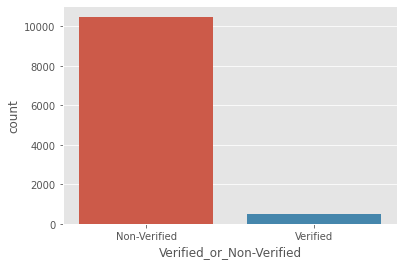

In [8]:
sns.countplot(x = 'Verified_or_Non-Verified', data = tweet_df)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2350 missing from current font.
  font.

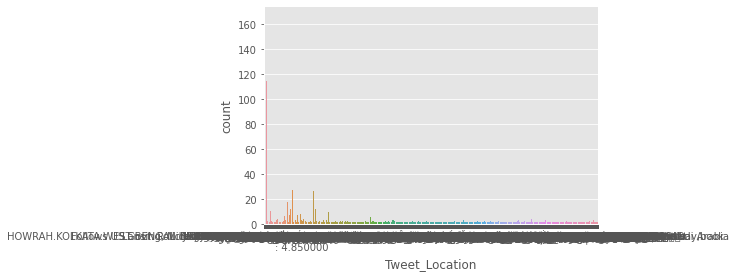

In [ ]:
sns.countplot(x = 'Tweet_Location', data = tweet_df)


Word Cloud

(-0.5, 399.5, 199.5, -0.5)

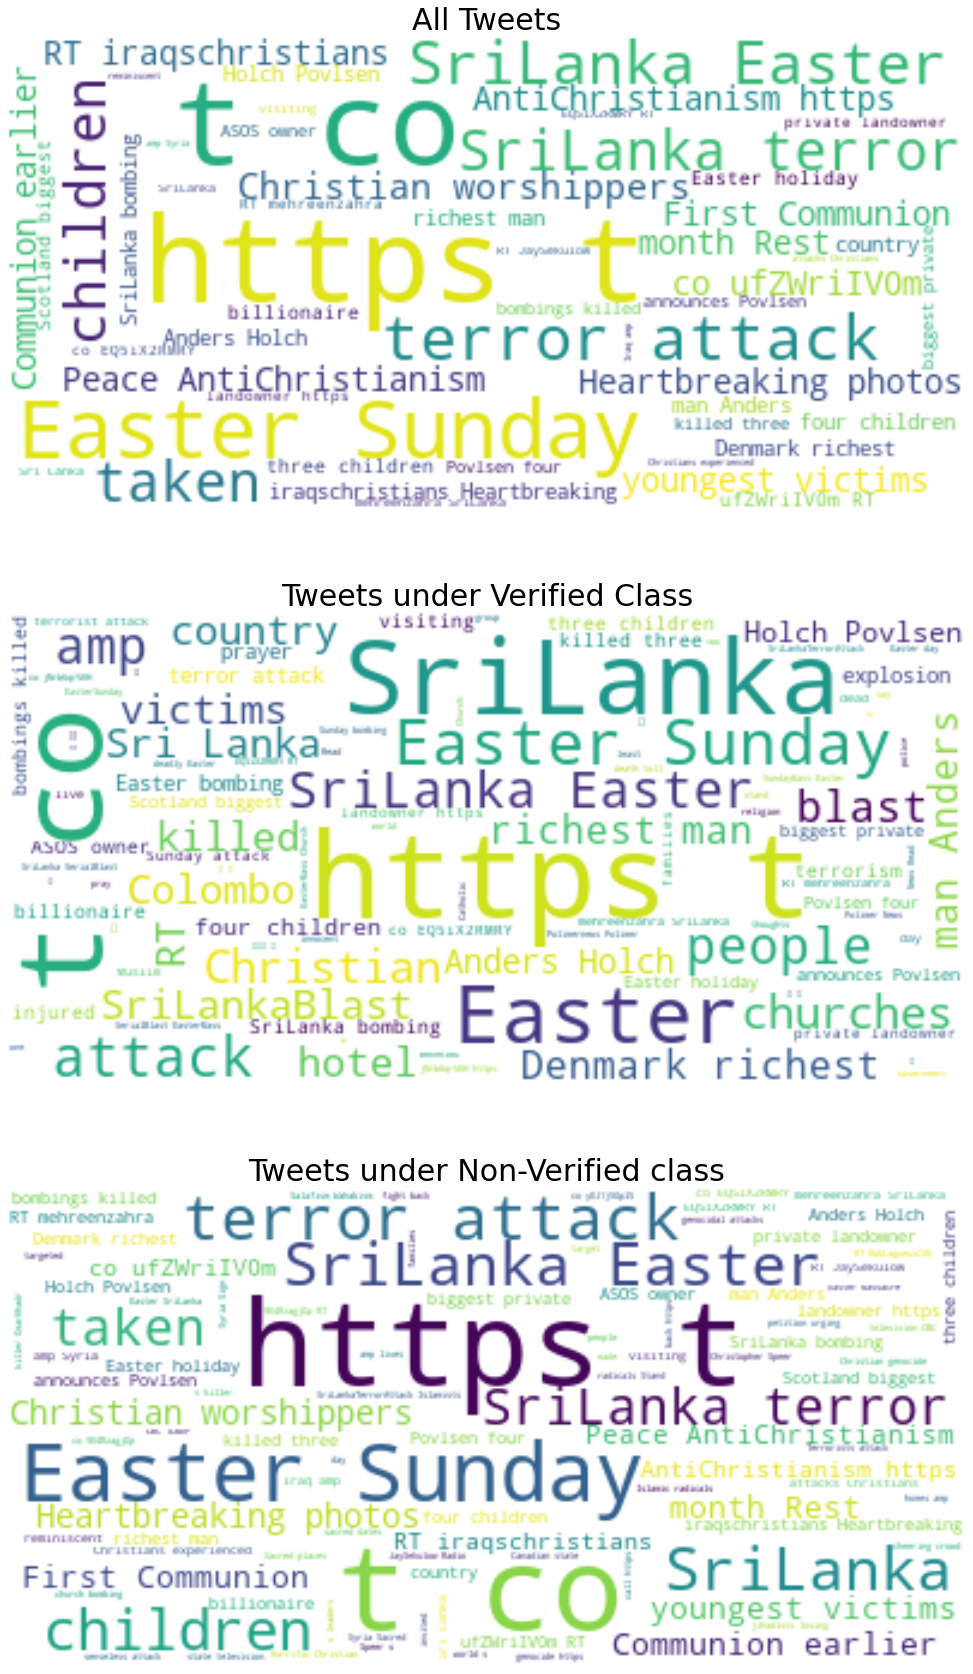

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_Verified = tweet_df[tweet_df['Verified_or_Non-Verified']=='Verified']
df_NVerified = tweet_df[tweet_df['Verified_or_Non-Verified']=='Non-Verified']
tweet_All = " ".join(review for review in tweet_df.Tweet_Content)
tweet_Verified = " ".join(review for review in df_Verified.Tweet_Content)
tweet_NVerified = " ".join(review for review in df_NVerified.Tweet_Content)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_Verified = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_Verified)
wordcloud_NVerified = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NVerified)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_Verified, interpolation='bilinear')
ax[1].set_title('Tweets under Verified Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NVerified, interpolation='bilinear')
ax[2].set_title('Tweets under Non-Verified class',fontsize=30)
ax[2].axis('off')

..........................................................................

** *italicised text*Cleaning Tweets Data** *italicised text*

In [ ]:
#df  = pd.DataFrame(tweet_df[['Tweet_Id','User_Id', 'Tweet_Content']])

df  = pd.DataFrame(tweet_df[['Tweet_Id','Tweet_Type','User_Id','Name','Screen_Name', 'Tweet_Content','Retweets_Received','Favourites_Received',
                            'Verified_or_Non-Verified','User_Followers','User_Following','Favourites_Count','Statuses_Count',
                             'User_Account_Creation_Date','User_Bio','Tweet_Location','Tweet_Posted_Time_(UTC)','Protected_or_Non-protected']])

df_credible  = pd.DataFrame(tweet_credible_df[['Tweet_Id','Tweet_Type','User_Id','Name','Screen_Name', 'Tweet_Content','Retweets_Received','Favourites_Received',
                            'Verified_or_Non-Verified','User_Followers','User_Following','Favourites_Count','Statuses_Count',
                             'User_Account_Creation_Date','User_Bio','Tweet_Location','Tweet_Posted_Time_(UTC)','Protected_or_Non-protected']])




In [ ]:
#nltk.download('stopwords')
ps = nltk.PorterStemmer()
string.punctuation
wn = nltk.WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
#print(stop_words)

#from nltk.corpus import stopwords
#stopword = nltk.corpus.stopwords.words('english')

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def tokenization(text):
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text






In [ ]:
df["Tweet_Content_URL"] = df["Tweet_Content"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
df['Tweet_punct'] = df['Tweet_Content_URL'].apply(lambda x: remove_punct(x))
df['User_Id_punct'] = df['User_Id'].apply(lambda x: x.replace('"', ''))
df['Tweet_Id_punct'] = df['Tweet_Id'].apply(lambda x: x.replace('"', ''))
df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
#df.head(1)

##################################

#cleaning the credible datasource 

df_credible["Tweet_Content_URL"] = df_credible["Tweet_Content"].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip()
df_credible['Tweet_punct'] = df_credible['Tweet_Content_URL'].apply(lambda x: remove_punct(x))
df_credible['User_Id_punct'] = df_credible['User_Id'].apply(lambda x: x.replace('"', ''))
df_credible['Tweet_Id_punct'] = df_credible['Tweet_Id'].apply(lambda x: x.replace('"', ''))
df_credible['Tweet_tokenized'] = df_credible['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df_credible['Tweet_nonstop'] = df_credible['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df_credible['Tweet_stemmed'] = df_credible['Tweet_nonstop'].apply(lambda x: stemming(x))
df_credible['Tweet_lemmatized'] = df_credible['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df_credible.head(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


,Tweet_Id,Tweet_Type,User_Id,Name,Screen_Name,Tweet_Content,Retweets_Received,Favourites_Received,Verified_or_Non-Verified,User_Followers,...,Tweet_Posted_Time_(UTC),Protected_or_Non-protected,Tweet_Content_URL,Tweet_punct,User_Id_punct,Tweet_Id_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"""1129298331744768000""",Tweet,"""1100241609721958400""",Adadrana,Adadrana,https://t.co/U5hkTCBPbC \n#eastersundayattackslk #srilankaattacks #srilankan #colombo #attacks #...,0,6,Non-Verified,604,...,17/05/2019 08:11,Non-Protected,#eastersundayattackslk #srilankaattacks #srilankan #colombo #attacks #sri #srilanka #lka #isis #...,eastersundayattackslk srilankaattacks srilankan colombo attacks sri srilanka lka isis easter new...,1100241609721958400,1129298331744768000,"[eastersundayattackslk, srilankaattacks, srilankan, colombo, attacks, sri, srilanka, lka, isis, ...","[eastersundayattackslk, srilankaattacks, srilankan, colombo, attacks, sri, srilanka, lka, isis, ...","[eastersundayattackslk, srilankaattack, srilankan, colombo, attack, sri, srilanka, lka, isi, eas...","[eastersundayattackslk, srilankaattacks, srilankan, colombo, attack, sri, srilanka, lka, isi, ea..."


**MODEL ONE**

[link text](https://) 1.Data set prepare for model one

In [ ]:
model_1_dataset  = pd.DataFrame(df[['Tweet_Id_punct','Tweet_Type','User_Id_punct','Name','Screen_Name', 'Tweet_lemmatized','Retweets_Received','Favourites_Received',
                            'Verified_or_Non-Verified','User_Followers','User_Following','Favourites_Count','Statuses_Count',
                             'User_Account_Creation_Date','User_Bio','Tweet_Location','Tweet_Posted_Time_(UTC)','Protected_or_Non-protected']])
model_1_dataset.rename(columns = {'Tweet_lemmatized':'Tweet_Content','Tweet_Id_punct':'Tweet_Id','User_Id_punct':'User_Id'}, inplace = True)



In [ ]:
model_1_dataset.head(1)

,Tweet_Id,Tweet_Type,User_Id,Name,Screen_Name,Tweet_Content,Retweets_Received,Favourites_Received,Verified_or_Non-Verified,User_Followers,User_Following,Favourites_Count,Statuses_Count,User_Account_Creation_Date,User_Bio,Tweet_Location,Tweet_Posted_Time_(UTC),Protected_or_Non-protected
0,1130420279627395072,Tweet,22595284,HotelierME,HotelierME,"[srilanka, hotel, occupancy, drop, following, easter, sunday, bombing]",0,0,Non-Verified,15335,4,1380,43301,03 Mar 2009 06:39:39,The online home for hospitality industry professionals in the Middle East,United Arab Emirates,20 May 2019 10:29:31,Non-Protected


In [ ]:
model_1_dataset1 = model_1_dataset.copy()
model_1_dataset1.head(1)

,Tweet_Id,Tweet_Type,User_Id,Name,Screen_Name,Tweet_Content,Retweets_Received,Favourites_Received,Verified_or_Non-Verified,User_Followers,User_Following,Favourites_Count,Statuses_Count,User_Account_Creation_Date,User_Bio,Tweet_Location,Tweet_Posted_Time_(UTC),Protected_or_Non-protected
0,1130420279627395072,Tweet,22595284,HotelierME,HotelierME,"[srilanka, hotel, occupancy, drop, following, easter, sunday, bombing]",0,0,Non-Verified,15335,4,1380,43301,03 Mar 2009 06:39:39,The online home for hospitality industry professionals in the Middle East,United Arab Emirates,20 May 2019 10:29:31,Non-Protected


In [ ]:
model_1_dataset2=model_1_dataset1.drop(['Tweet_Id', 'Tweet_Content'], axis=1)
model_1_dataset2.head(1)

,Tweet_Type,User_Id,Name,Screen_Name,Retweets_Received,Favourites_Received,Verified_or_Non-Verified,User_Followers,User_Following,Favourites_Count,Statuses_Count,User_Account_Creation_Date,User_Bio,Tweet_Location,Tweet_Posted_Time_(UTC),Protected_or_Non-protected
0,Tweet,22595284,HotelierME,HotelierME,0,0,Non-Verified,15335,4,1380,43301,03 Mar 2009 06:39:39,The online home for hospitality industry professionals in the Middle East,United Arab Emirates,20 May 2019 10:29:31,Non-Protected


In [ ]:
model_1_dataset3=model_1_dataset2.drop_duplicates(subset=['User_Id'])


*MODEL ONE*

In [ ]:
#model 1

rule_df = pd.read_csv("gdrive/My Drive/Colab Notebooks/rule_doc.csv")
rule_df

,no,short code,feature,value,score
0,1,FC,Number of Followers count,10000,1
1,2,TC,number of tweets posted count,10000,1
2,3,VT,user profile verified from twitter,verifired,1
3,4,REC,number of retweet count,1,1
4,5,FCP,number of favourites count for post,10,1
5,6,NV,same screen name and user name,same name,0
6,7,BE,user bio is not empty,not empty,1
7,8,TL,tweet location is not empty,not empty,1
8,9,DT,user account created date and tweet posted time is not similer,not similer,1
9,10,TT,tweet type,retweet,1


In [ ]:
for index, row in model_1_dataset3.iterrows(): #print('id: {}, name: {}, location: {}'.format(row[0], row[1], row[9]))
  user = model_1_dataset3(row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9])
users.append(user)

TypeError: ignored

In [ ]:
def division_1000(x):
   return x/10000

def division_10(x):
   return x/10

def division_1(x):
   return x/1

def verification(row):  
    if row['Verified_or_Non-Verified'] =='Verified':
        return 1
    return 0

def categorise(row):  
    if row['Name'] !=row['Screen_Name']:
        return 1
    return 0


def my_func(row):

   if row['User_Bio_result'] ==True :
        return 1
   elif row['User_Bio_result'] ==False :
        return 0

def tweetlocation(row):

   if row['Tweet_Location'] ==True :
        return 1
   elif row['Tweet_Location'] ==False :
        return 0

def UF_count(row):
    return  User_Following - User_Followers

def TT_count(row):
   if row['Tweet_Type'] =='Tweet':
      return 0.5
   elif row['Tweet_Type'] =='ReTweet':
      return 1


Apply dataset to the functions

In [ ]:
model_1_result=model_1_dataset3[['User_Id', 'Name']].copy()

In [ ]:

#model_1_dataset2=model_1_dataset1.drop(['Tweet_Id', 'Tweet Content'], axis=1)
model_1_result[['FCP','FC','SC']] = model_1_dataset3[['Favourites_Count','User_Followers','Statuses_Count']].apply(division_1000)
model_1_result['REC'] =model_1_dataset3[['Retweets_Received']].apply(division_1)
model_1_result['VT'] = model_1_dataset3.apply(lambda row: verification(row), axis=1)
model_1_result['NV'] = model_1_dataset3.apply(lambda row: categorise(row), axis=1)

model_1_dataset3['User_Bio_result']=model_1_dataset3['User_Bio'].isnull().values.any()
model_1_result['BE'] = model_1_dataset3.apply(lambda row: my_func(row), axis=1)
model_1_dataset3['Tweet_Location_result']=model_1_dataset3['Tweet_Location'].isnull().values.any()
model_1_result['TL'] = model_1_dataset3.apply(lambda row: my_func(row), axis=1)
model_1_result['UF'] = model_1_dataset3.apply(lambda row: my_func(row), axis=1)

model_1_result['TT'] = model_1_dataset3.apply(lambda row: TT_count(row), axis=1)

#model_1_result.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
model_1_result= model_1_result.eval('Sum = FCP + FC + SC + REC + VT + NV + BE + TL + UF + TT')
model_1_result.head(5)


,User_Id,Name,FCP,FC,SC,REC,VT,NV,BE,TL,UF,TT,Sum
0,22595284,HotelierME,0.1380,1.5335,4.3301,0.0,0,0,1,1,1,0.5,9.5016
1,557916099,Imtiaz Shar PYO,17.3770,0.5255,3.1589,0.0,0,1,1,1,1,1.0,26.0614
2,392978157,eTravel Technologies Inc.,0.0211,0.0478,0.5862,0.0,0,1,1,1,1,0.5,5.1551
3,1951067186,Chandani Kirinde 🇱🇰,3.8397,1.1043,4.9764,0.0,0,1,1,1,1,1.0,14.9204
4,9909452,Vipulananda 🇱🇰,11.8806,0.3053,12.2186,1.0,0,1,1,1,1,0.5,29.9045


# MODEL TWO

In [ ]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 4.4 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3157185 sha256=7f171943976c136750985bfe295f0cc99a5d22b0c5befc0c34272b1e22124379
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
from scipy.spatial.distance import cosine
import numpy as np
import fasttext
import fasttext.util

In [ ]:
    # download an english model
    #fasttext.util.download_model('en', if_exists='ignore')  # English
    #model = fasttext.load_model('gdrive/My Drive/Colab Notebooks/cc.en.300.bin')
    #gdrive/My Drive/Colab Notebooks/cc.en.300.bin.gz
#only below command run when run time reconnected,
!gunzip "gdrive/My Drive/Colab Notebooks/cc.en.300.bin.gz" -d "gdrive/My Drive/Colab Notebooks/cc.en.300.bin"


gzip: gdrive/My Drive/Colab Notebooks/cc.en.300.bin.gz: No such file or directory
gzip: gdrive/My Drive/Colab Notebooks/cc.en.300.bin.gz: No such file or directory


In [ ]:
model = fasttext.load_model('gdrive/My Drive/Colab Notebooks/cc.en.300.bin')

ValueError: ignored

In [ ]:
model_2_dataset1  = pd.DataFrame(df[['User_Id_punct', 'Tweet_lemmatized']])
model_2_dataset1.rename(columns = {'Tweet_lemmatized':'Tweet_Content','User_Id_punct':'User_Id'}, inplace = True)

df_credible_apply_model2=pd.DataFrame(df_credible[['User_Id_punct', 'Tweet_lemmatized']])
df_credible_apply_model2.rename(columns = {'Tweet_lemmatized':'Tweet_Content','User_Id_punct':'User_Id'}, inplace = True)


In [ ]:
import re
def untokenize(words):
    """
    Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

In [ ]:

model_2_dataset1['Tweet_untokanized']= model_2_dataset1['Tweet_Content'].apply(lambda x: untokenize(x))
model_2_dataset2  = pd.DataFrame(model_2_dataset1[['User_Id', 'Tweet_untokanized']])
model_2_dataset2.rename(columns = {'Tweet_untokanized':'Tweet_Content'}, inplace = True)
model_2_dataset2.head(1)

##################################################model 2 credible details

df_credible_apply_model2['Tweet_untokanized']= df_credible_apply_model2['Tweet_Content'].apply(lambda x: untokenize(x))
df_credible_apply_model2  = pd.DataFrame(df_credible_apply_model2[['User_Id', 'Tweet_untokanized']])
df_credible_apply_model2.rename(columns = {'Tweet_untokanized':'Tweet_Content'}, inplace = True)




In [ ]:
import re,math
from collections import Counter

WORD = re.compile(r'\w+')

def text_to_vector(text):
   words = model.get_sentence_vector(text)
   # WORD.findall()
   return words

def text_to_vector1(text):
    text = [model.get_sentence_vector(word) for word in text]
    return text

def text_to_vector2(text):
    text = [model.get_word_vector(word) for word in text]
    return text


def text_to_vector3(text):
    text = model.get_word_vector(text)
    return text
#text2= file('srilanka_easter.csv').read()
#vector1 = text_to_vector(text2)



In [ ]:
#model_2_dataset2|User_Id|	Tweet_Content

model_2_dataset2['Tweet_sentence_vec'] = model_2_dataset2['Tweet_Content'].apply(lambda x: text_to_vector(x))
#model_2_dataset2.head(1)


model_2_dataset2['Tweet_word_vec'] = model_2_dataset2['Tweet_Content'].apply(lambda x: text_to_vector3(x))
#model_2_dataset2.head(3)



##################################sentence and word vecotr for credible sources

df_credible_apply_model2['Tweet_sentence_vec'] = df_credible_apply_model2['Tweet_Content'].apply(lambda x: text_to_vector(x))
#model_2_dataset2.head(1)
df_credible_apply_model2['Tweet_word_vec'] = df_credible_apply_model2['Tweet_Content'].apply(lambda x: text_to_vector3(x))
df_credible_apply_model2.head(1)




In [ ]:
#Tweet_sentence_vec

from sklearn.metrics.pairwise import cosine_similarity

s = df_credible_apply_model2['Tweet_sentence_vec'].sample(n=1).tolist()

model_2_dataset2['Tweet_sentence_com'] = np.tile(s, (len(model_2_dataset2), 1)).tolist()
model_2_dataset2['cosine_sim_senetence'] = cosine_similarity(model_2_dataset2['Tweet_sentence_vec'].tolist(), s)


s1 = df_credible_apply_model2['Tweet_word_vec'].sample(n=1).tolist()

model_2_dataset2['Tweet_word_vec_com'] = np.tile(s, (len(model_2_dataset2), 1)).tolist()
model_2_dataset2['cosine_sim_word'] = cosine_similarity(model_2_dataset2['Tweet_word_vec'].tolist(), s)


In [ ]:
model_2_dataset2.head(2)

In [ ]:
model_2_dataset2.to_csv('model_2_dataset2.csv')

In [ ]:
!cp data.csv "gdrive/My Drive/Colab Notebooks/"

In [ ]:
#from sklearn.metrics.pairwise import cosine_similarity

#cosine_similarity(model_2_dataset2['Tweet_word_vec'].tolist(), model_2_dataset2['Tweet_sentence_vec'].tolist())

#from scipy.spatial.distance import cosine

#model_2_dataset2['cosine'] = model_2_dataset2.apply(lambda row: 1 - cosine(row['Tweet_word_vec'], row['Tweet_sentence_vec']), axis=1)
#model_2_dataset2.head(2)


#cosine_similarity(df["a"].tolist(), df["b"].tolist())
#from scipy.spatial.distance import cosine

#model_2['cosine'] = model_2.apply(lambda row: 1 - cosine(row['Tweet_word_vec'], row['Tweet_sentence_vec']), axis=1)
#model_2.head(2)

#def cosine_similarity(embedding_1, embedding_2):
        # Calculate the cosine similarity of the two embeddings.
  #      sim = 1 - cosine(embedding_1, embedding_2)
  #      print('Cosine similarity: {:.2}'.format(sim))
        
    # compare the embeddings
#model_2_dataset2['cosine']=cosine_similarity(model_2_dataset2['Tweet_word_vec'], model_2_dataset2['Tweet_sentence_vec'])

***FINAL MODEL***

In [ ]:
df3 = pd.concat([model_1_result, model_2_dataset2],axis=1, ignore_index=False, sort=False)

#T1 = pd.merge(model_1_result, model_2_dataset2, on='User_Id'.index, how='outer')
#df3.head(3)

Final_dataset  = pd.DataFrame(df3[['User_Id','Tweet_Content','Sum','cosine_sim_senetence','cosine_sim_word']])

Final_dataset.head(3)

Final_dataset = Final_dataset.loc[:, ~Final_dataset.columns.duplicated()]

Final_dataset.head(3)


In [ ]:
#Here assume contant value T_value as 0.05

T_VALUE=0.05

Final_dataset['score_sentence_level']= Final_dataset['Sum'] * T_VALUE + Final_dataset['cosine_sim_senetence']
Final_dataset['score_word_level']= Final_dataset['Sum'] * T_VALUE + Final_dataset['cosine_sim_word']



In [ ]:
Final_dataset.head(2)

In [ ]:
def labelling(value):
    if value > 1:
      return 'Real'
    return 'Fake'

Final_dataset['Label_word_level'] = Final_dataset['score_word_level'].apply(labelling)
Final_dataset['Label_senetence_level'] = Final_dataset['score_sentence_level'].apply(labelling)

Final_dataset.head(2)


Model result in a graphical way

In [ ]:
fig, ax =plt.subplots(1,2)
sns.countplot(Final_dataset['Label_word_level'], ax=ax[0])
sns.countplot(Final_dataset['Label_senetence_level'], ax=ax[1])
fig.show()

**Apply Classification to check accuracy of the model**

Prepare dataset as test and train

In [ ]:
#labeling
#X = np.array(Final_dataset['score'])[:]
#y = np.array(Final_dataset['Label'])[:]

X_word = np.array(Final_dataset['score_word_level'])
y_word = np.array(Final_dataset['Label_word_level'])

X_senetenc = np.array(Final_dataset['score_sentence_level'])
y_senetenc = np.array(Final_dataset['Label_senetence_level'])

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset

# split into train test sets
X_word_train, X_word_test, y_word_train, y_word_test = train_test_split(X_word, y_word, test_size=0.30)

X_sentence_train, X_sentence_test, y_sentence_train, y_sentence_test = train_test_split(X_senetenc, y_senetenc, test_size=0.30)

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
X_word_train = X_word_train.reshape(-1, 1)
X_word_test = X_word_test.reshape(-1, 1)

X_sentence_train = X_sentence_train.reshape(-1, 1)
X_sentence_test = X_sentence_test.reshape(-1, 1)

Apply to SVM

In [ ]:
from sklearn.svm import SVC
#svc = SVC(C=1.0, random_state=1, kernel='linear')
svc = SVC(C=1.0, random_state=1, kernel='linear')


In [ ]:
X_word_train

In [ ]:
#svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_word_train, y_word_train)

In [ ]:

    
    # Getting word vectors for 'one' and 'two'.
    embedding_1 = model.get_sentence_vector('baby dog')
    embedding_2 = model.get_word_vector('puppy')
    embedding_3 = model.get_sentence_vector('puppy')
    


In [ ]:
   def cosine_similarity(embedding_1, embedding_2):
        # Calculate the cosine similarity of the two embeddings.
        sim = 1 - cosine(embedding_1, embedding_2)
        print('Cosine similarity: {:.2}'.format(sim))
        
    # compare the embeddings
    cosine_similarity(embedding_1, embedding_2)
    # compare the embeddings
    cosine_similarity(embedding_1, embedding_3)
    
    
    # Checking if the two approaches yield the same result.
    is_equal = np.array_equal(embedding_2, embedding_3)
    
    # Printing the result.
    print(is_equal)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
model = [model.get_sentence_vector(word) for word in text]
title=model_2['Tweet_word_vec'].tolist()
claim=df['claim'].tolist()
title=model.encode(title)
claim=model.encode(claim)
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(title[0].reshape(1,-1),claim[0].reshape(1,-1))

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(model_2[3].reshape(1,-1),model_2[4].reshape(1,-1))

model_2['Tweet_word_vec'] = model_2['Tweet'].apply(lambda x: text_to_vector2(x))
model_2.head(1)

In [ ]:
#from sklearn.metrics.pairwise import cosine_similarity
model_2['Tweet_word_vec'] = model_2['Tweet'].apply(lambda x: text_to_vector2(x))
#from sentence_transformers import SentenceTransformer
#model = SentenceTransformer('bert-base-nli-mean-tokens')
#title=model_2['Tweet_sentence_vec']
#claim=model_2['Tweet_word_vec']
#.tolist()
#title=model.encode(title)
#claim=model.encode(claim)
from sklearn.metrics.pairwise import cosine_similarity
#model_2['cosine_sim']=cosine_similarity(title[0],claim[0]).reshape(-1,1)
model_2['cosine_sim']=cosine_similarity(model_2['Tweet_sentence_vec'],model_2['Tweet_word_vec'])
#AttributeError: 'list' object has no attribute 'reshape'

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
title=df['title'].tolist()
claim=df['claim'].tolist()
title=model.encode(title)
claim=model.encode(claim)
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(title[0].reshape(1,-1),claim[0].reshape(1,-1))

In [ ]:
def cosine_similarity(Tweet_sentence_vec	, Tweet_word_vec):
#alculate the cosine similarity of the two embeddings.
  sim = 1 - cosine(Tweet_sentence_vec, Tweet_word_vec)
  print('Cosine similarity: {:.2}'.format(sim))


  # compare the embeddings
cosine_similarity(embedding_1, embedding_2)


model_2['Tweet_sentence_vec'] = model_2['Tweet'].apply(lambda x: text_to_vector1(x))
model_2.head(1)
# compare the embeddings
cosine_similarity(embedding_1, embedding_3)

In [ ]:
 # Getting word vectors for 'one' and 'two'.
embedding_1 = model.get_sentence_vector('baby dog')
embedding_2 = model.get_word_vector('puppy')
embedding_3 = model.get_sentence_vector('puppy')
    
def cosine_similarity(embedding_1, embedding_2):
#alculate the cosine similarity of the two embeddings.
  sim = 1 - cosine(embedding_1, embedding_2)
  print('Cosine similarity: {:.2}'.format(sim))
        
# compare the embeddings
cosine_similarity(embedding_1, embedding_2)
# compare the embeddings
cosine_similarity(embedding_1, embedding_3)
    
    
# Checking if the two approaches yield the same result.
is_equal = np.array_equal(embedding_2, embedding_3)
    
# Printing the result.
print(is_equal)

In [ ]:
import re,math
from collections import Counter

WORD = re.compile(r'\w+')

def text_to_vector(text):
   words = model.get_sentence_vector(text)
   # WORD.findall()
   return Counter(words)

 #text1 = 'This is a foo bar sentence .'
 #text2 = 'This sentence is similar to a foo bar sentence .'
#text1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/srilanka_easter.csv')

text2= file('srilanka_easter.csv').read()
vector1 = text_to_vector(text2)
 #vector2 = text_to_vector(text2)

